# Modelado de un conjunto de antenas (Antenna Array)

Un conjunto de antenas puede ser utilizado para dirigir las ondas de radio en una dirección particular ajustando el número de elementos, su distribución geométrica, las amplitudes relativas y la fase.


Consideremos un conjunto de n antenas istropicas en las posiciones di 
distribuidas uniformemente con una separación d a lo largo del eje x 
desde el origen. 

Si una antena individual produce un vector de radiación F(k) donde $k=k\hat{r}$, el vector total de radiación debido a las n antenas es:

$F_{tot}(k)= \sum_{j-0}^{n-1}w_j e^{jikd_j}F(k)=A(k)F(k)$

donde $w_j$ es el coeficiente de alimentacieon de la antena j, representando
la amplitud y la fase y A(k) se conoce como el factor de conjunto.  
Podemos elegir $w_0=1$ para especificar los coeficientes de alimentación relativos
al origen.

Si además solamente analizamos el ángulo acimutal $\phi$ y fijamos el ángulo polar $\theta=\pi/2$, obtenemos:

$A(\phi)=\sum_{j=0}^{n-1}w_je^{jikd cos(\phi)}$

El patreon relativo de potencia de radiación (ganancia) es el cuadrado de esta cantidad. Para dos antenas idénticas:

$g(\phi)=|A(\phi)|^2 = |w_0 + w_1 e^{ikd cos(\phi)}|^2$

El siguiente código obtenemos la ganancia directiva, $10log_{10}(g/g_{max})$, en una gráfica como función de $\phi$;
para el caso de dos antenas con una separación $d=\lambda$, $w_0=1$ y $w_1=i$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def gain(d,w):
### Calcula la potencia como una función del ángulo acimutal phi 
    phi = np.linspace(0,2*np.pi, 1000)
    psi = 2*np.pi*d/lam*np.cos(phi)
    A=w[0]+w[1]*np.exp(1j*psi)
    g = np.abs(A)**2
    return phi,g

In [19]:
def get_directive_gain(g, minDdBi=-20):
### Devulelve la ganancia directiva del conjunto de antena
    DdBi = 10 * np.log10(g/np.max(g))
    return np.clip(DdBi,minDdBi, None)

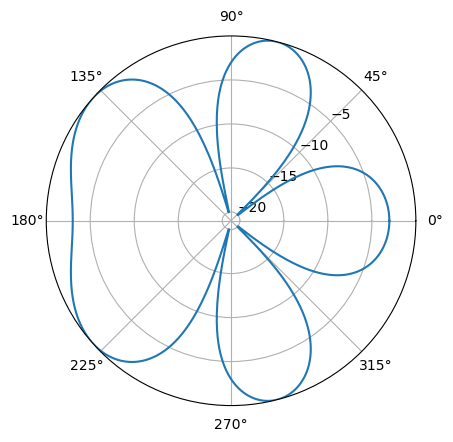

In [21]:
#Wavelength, antenna spacing, feed coefficients
lam=1
d = lam
w = np.array([1,-1j])
# compute gain and rirective gain; plot on a polar chart
phi, g = gain(d,w)
DdBi=get_directive_gain(g)

plt.polar(phi,DdBi)
ax=plt.gca()
ax.set_rticks([-20, -15, -10, -5])
ax.set_rlabel_position(45)
plt.show()

In [22]:
def gainN(d,w):
    ### calcula la potencia como función del ángulo acimutal
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = 2*np.pi * d / lam * np.cos(phi)
    j = np.arange(len(w))
    A = np.sum(w[j] * np.exp(j * 1j * psi[:, None]), axis=1)
    g = np.abs(A)**2
    return phi, g


In [23]:
def get_directive_gainN(g, minDdBi=-20):
    ### ganancia directiva
    DdBi = 10 * np.log10(g / np.max(g))
    return np.clip(DdBi, minDdBi, None)

In [27]:
# longitud de onda, espacio entre antenas y coeficiente de alimentación
lam = 1
d = lam / 2
w = np.array([1, -1, 1])
# Calculate gain and directive gain; plot on a polar chart.
phi, g = gain(d, w)
DdBi = get_directive_gain(g)

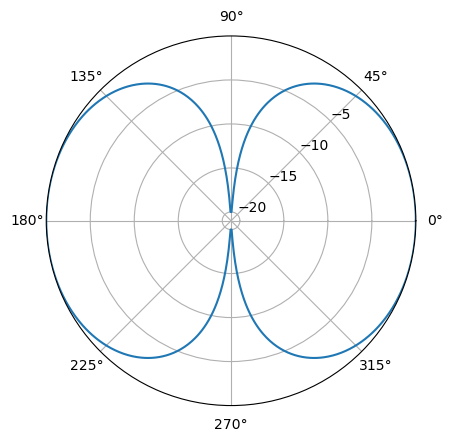

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.plot(phi, DdBi)
ax.set_rticks([-20, -15, -10, -5])
ax.set_rlabel_position(45)
plt.show()